In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
plt.rcParams["animation.html"]='jshtml'
%matplotlib notebook
# %matplotlib inline

# All Optimizers

## Moving Average

### Creating Simple data using Cos function

In [119]:
X=np.array(np.linspace(3.9,8.7,100))
Cos=np.cos(X)

<IPython.core.display.Javascript object>


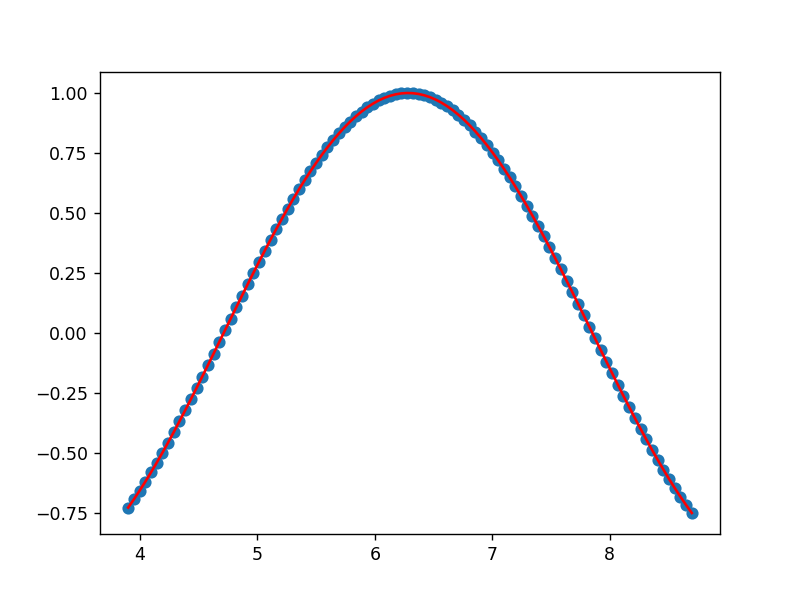

In [121]:
plt.scatter(X,Cos)
plt.plot(X,Cos,c="r")

### Adding some Noise to the data 

In [130]:
Noise=Cos+np.random.rand(100)
Cos=Cos+0.5

<IPython.core.display.Javascript object>


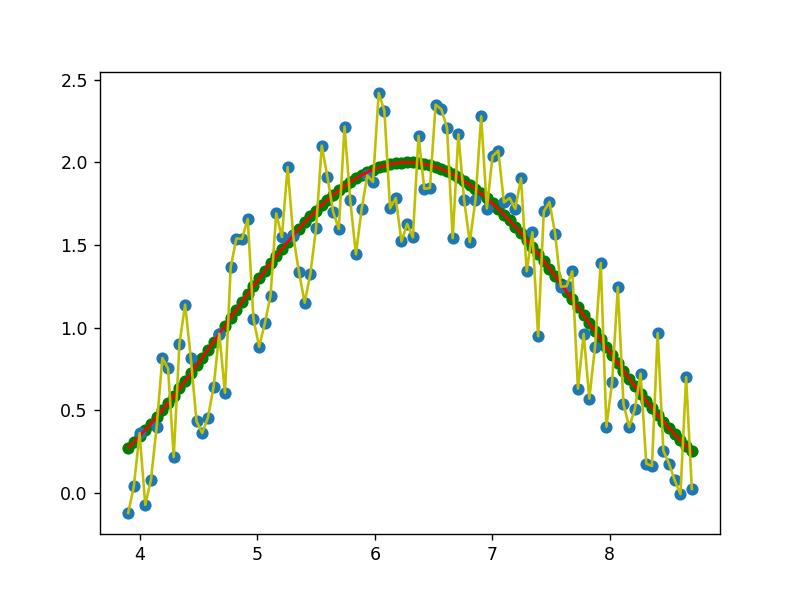

In [150]:
plt.scatter(X,Cos,c='g')
plt.plot(X,Cos,c="r")
plt.scatter(X,Noise)
plt.plot(X,Noise,c="y")

### As we can see the fluctuation is very hing in the above dataset (" Considering it as gradient")

In [151]:
def mov(x,beta):
    new=[]
    old=0
    for i in range(len(x)):
        val=(beta*old)+(1-beta)*(x[i])
        new.append(val)
        old=val
    return np.array(new)

In [168]:
mov_avg=mov(Noise,0.7)

<IPython.core.display.Javascript object>


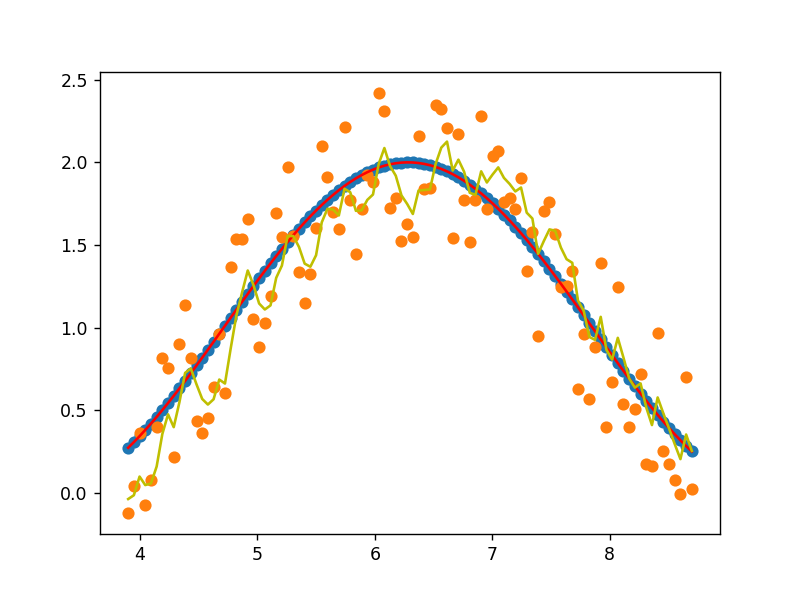

In [171]:
plt.scatter(X,Cos)
plt.plot(X,Cos,c="r")
plt.scatter(X,Noise)
# plt.plot(X,Noise,c="r")
plt.plot(X,mov_avg,c='y')


### After taking moving average the fluctuation has been reduced

# 1. SGD-Optimizer

In [172]:
def fx2(x):
    return 2*x + 3
  
x = np.array(np.linspace(-1, 1, 100))
y = np.array([fx2(x) for x in x])

In [173]:
def SGD(X,y,lr,iteration):
    weight=0
    bias=0
    n=len(y)
    np.random.seed(20)
    W_list,b_list,cost_list=[],[],[]
    fig=plt.figure()
    ax=fig.add_subplot(111)
    for i in range(iteration):
        for j in range(len(X)):
            random_data=np.random.randint(len(X))
            YP=np.dot(X[random_data],weight)+bias
            cost=(y[random_data]-YP)**2
            dw=-2*(np.dot((y[random_data]-YP),(X[random_data])))
            dc=-2*(y[random_data]-YP)
            weight=weight-(lr*dw)
            bias=bias-(lr*dc)
            W_list.append(weight)
            b_list.append(bias)
            cost_list.append(cost)
#         ax.scatter(W_list,cost_list)
        ax.plot(W_list)
        ax.plot(b_list)
        fig.canvas.draw()
    return weight,bias,cost

In [174]:
def predict(X,W,b):
    return X*W+b

<IPython.core.display.Javascript object>


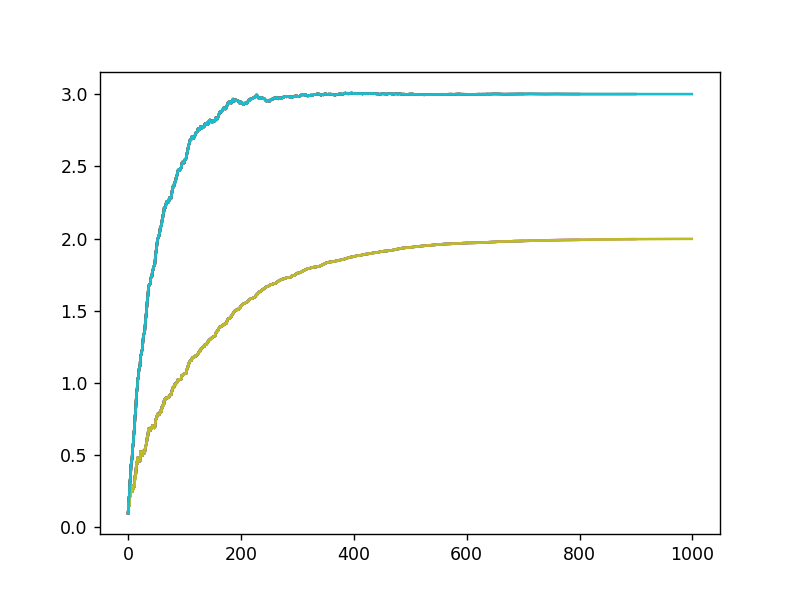

(1.9980619779601383, 3.000265518057174, 2.347491021951516e-06)

In [175]:
SGD(x,y,0.01,10)

In [50]:
y_pred=predict(X,W1,b1)

# 2.Mini-Batch SGD

In [23]:
def fx2(x):
    return 2*x + 3
  
X = np.array(np.linspace(-1, 1, 100))
y = np.array([fx2(x) for x in x])

In [24]:
def create_Mini_batch(X,y,batch_size):
    
    if len(X.shape)<2:
        data=np.hstack((X.reshape(-1,1),y.reshape(-1,1)))
    else:
        data=np.hstack((X,y))
    random_data=np.random.shuffle(data)
    mini_batch=[]
    for i in range(0,data.shape[0],batch_size):
        mini_x=data[i:i+batch_size,:-1]
        mini_y=data[i:i+batch_size,-1]
        mini_batch.append([mini_x.flatten(),mini_y])
    return mini_batch

In [63]:
import time
def minibatch_SGD(X,y,lr,iteration,batch_size):
    weight=0
    bias=0
    W_list,b_list,cost_list=[],[],[]
    fig=plt.figure()
    ax=fig.add_subplot(111)
    mini_batch=create_Mini_batch(X,y,batch_size)
    for i in range(iteration):
        
        for minibatch in mini_batch:
            n=len(minibatch[0])
            YP=np.dot(minibatch[0],weight)+bias
            cost=sum((minibatch[1]-YP)**2)
            dw=(-2/n)*(np.dot((minibatch[1]-YP),minibatch[0]))
            dc=(-2/n)*(sum((minibatch[1]-YP)))
            weight=weight-(lr*dw)
            bias=bias-(lr*dc)
            W_list.append(weight)
            b_list.append(bias)
            cost_list.append(cost)
#         ax.scatter(W_list,cost_list)
            ax.plot(W_list)
            ax.plot(b_list)
            fig.canvas.draw()
    return weight,bias,cost
def predict(X,W,b):
    return np.dot(X,W)+b

<IPython.core.display.Javascript object>


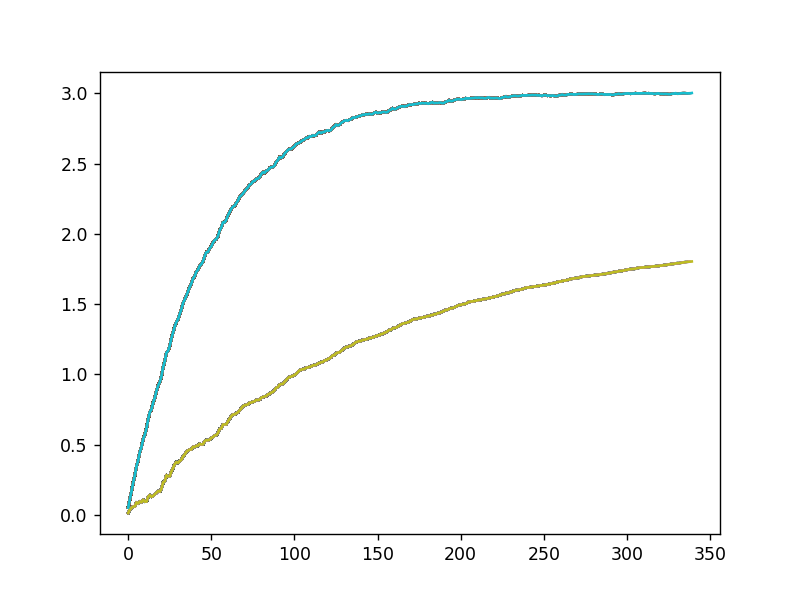

(1.8032404428749431, 3.002469211200405, 0.009475185320658257)

In [66]:
minibatch_SGD(X,y,0.01,10,3)

In [36]:
y_pred=predict(X,W,b)

<IPython.core.display.Javascript object>


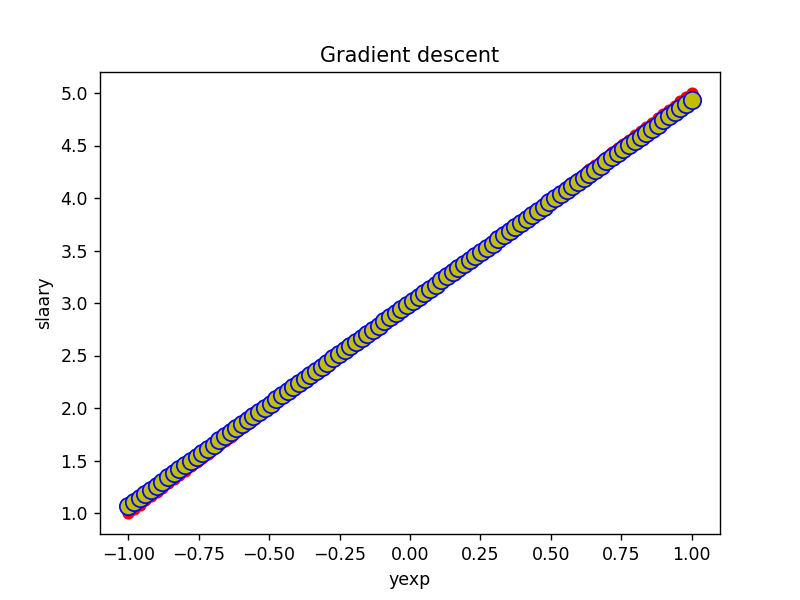

In [38]:
plt.plot(x,y_pred,marker='o',
         color='blue',markerfacecolor='y',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("yexp")
plt.ylabel("slaary")
plt.title("Gradient descent")
plt.show()

# 3. SGD with Momentum

y_pred=predict(x,w,b)

In [67]:
def fx2(x):
    return 2*x + 3
  
x = np.linspace(-1, 1, 100)
y = [fx2(x) for x in x]

In [177]:
def SGD_Momentum(X,y,lr,iteration,beta):
    weight=0
    bias=0
    n=len(y)
    np.random.seed(20)
    W_list,b_list,cost_list=[],[],[]
    fig=plt.figure()
    ax=fig.add_subplot(111)
    V_W,V_b=0,0
    for i in range(iteration):
        for j in range(n):
            random_data=np.random.randint(len(X))
            YP=(X[random_data]*weight)+bias
            cost=(y[random_data]-YP)**2
            dw=-2*((y[random_data]-YP)*(X[random_data]))
            db=-2*(y[random_data]-YP)
            V_W=(beta*V_W)+((1-beta)*dw)
            V_b=(beta*V_b)+((1-beta)*db)
            weight=weight-lr*V_W
            bias=bias-lr*V_b
            W_list.append(weight.item())
            b_list.append(bias.item())
            cost_list.append(cost)
#         ax.scatter(W_list,cost_list)
        ax.plot(W_list)
        ax.plot(b_list)
        fig.canvas.draw()
    return  weight,bias,cost

def predict(X,W,b):
    return X*W+b


In [178]:
SGD_Momentum(x,y,0.01,8,0.9)

<IPython.core.display.Javascript object>

(1.9938984189959368, 3.000456163381538, 1.1092057919596656e-05)

# 4.Mini_Batch With Momantum

In [179]:
def fx2(x):
    return 2*x + 3
  
x = np.array(np.linspace(-1, 1, 100))
y = np.array([fx2(x) for x in x])

In [180]:
import time

def create_Mini_batch(X,y,batch_size):
    
    if len(X.shape)<2:
        data=np.hstack((X.reshape(-1,1),y.reshape(-1,1)))
    else:
        data=np.hstack((X,y))
    random_data=np.random.shuffle(data)
    mini_batch=[]
    for i in range(0,data.shape[0],batch_size):
        mini_x=data[i:i+batch_size,:-1]
        mini_y=data[i:i+batch_size,-1]
        mini_batch.append([mini_x.flatten(),mini_y])
    return mini_batch

def minibatch_SGD_withM(X,y,lr,iteration,batch_size,beta=0.9):
    if len(X.shape)<2:
        weight=0
        bias=0
    else:
        weight=np.zeros(X.shape[1])
        bias=np.zeros(0)
    
    W_list,b_list,cost_list=[],[],[]
    fig=plt.figure()
    ax=fig.add_subplot(111)
    mini_batch=create_Mini_batch(X,y,batch_size)
    V_W,V_b=0,0
    for i in range(iteration):                  
        for minibatch in mini_batch:
            n=len(minibatch[0])
            YP=minibatch[0]*weight+bias
            cost=sum((minibatch[1]-YP)**2)
            dw=(-2/n)*(sum((minibatch[1]-YP)*minibatch[0]))
            db=(-2/n)*(sum((minibatch[1]-YP)))
            V_W=(beta*V_W)+(1-beta)*dw
            V_b=(beta*V_b)+(1-beta)*db
            weight=weight-lr*V_W
            bias=bias-lr*V_b
            cost_list.append(cost)
            W_list.append(weight)
            b_list.append(bias)
#         ax.scatter(W_list,cost_list)
#         ax.plot(cost)
            ax.plot(b_list)
            ax.plot(W_list)
            fig.canvas.draw()
    return weight,bias,cost
def predict(X,W,b):
    return X*W+b

In [181]:
minibatch_SGD_withM(x,y,0.01,20,10)

<IPython.core.display.Javascript object>

(1.501302710527753, 2.9790061001604977, 0.7519511717241085)

# 5. Adagrad Optimizer

In [182]:
def fx2(x):
    return 2*x + 3
  
x = np.array(np.linspace(-1, 1, 100))
y = np.array([fx2(x) for x in x])

In [185]:
import time

def create_Mini_batch(X,y,batch_size):
    
    if len(X.shape)<2:
        data=np.hstack((X.reshape(-1,1),y.reshape(-1,1)))
    else:
        data=np.hstack((X,y))
    random_data=np.random.shuffle(data)
    mini_batch=[]
    for i in range(0,data.shape[0],batch_size):
        mini_x=data[i:i+batch_size,:-1]
        mini_y=data[i:i+batch_size,-1]
        mini_batch.append([mini_x.flatten(),mini_y])
    return mini_batch

def Adagrad(X,y,lr,iteration,batch_size,eps=0.000000000000001):
    if len(X.shape)<2:
        weight=0
        bias=0
    else:
        weight=np.zeros(X.shape[1])
        bias=np.zeros(0)
    
    W_list,b_list,cost_list=[],[],[]
    fig=plt.figure()
    ax=fig.add_subplot(111)
    mini_batch=create_Mini_batch(X,y,batch_size)
    G_W,G_b=0,0
    for i in range(iteration):
        for minibatch in mini_batch:
            n=len(minibatch[0])
            YP=minibatch[0]*weight+bias
            cost=sum((minibatch[1]-YP)**2)
            dw=(-2/n)*(sum((minibatch[1]-YP)*minibatch[0]))
            db=(-2/n)*(sum((minibatch[1]-YP)))
            G_W+=dw*dw
            G_b+=db*dw
            weight=weight-((lr/np.sqrt(G_W + eps))*dw)
            bias=bias-((lr/np.sqrt(G_b + eps))*db)
            cost_list.append(cost)
            W_list.append(weight)
            b_list.append(bias)
#         ax.scatter(W_list,cost_list)

# #         ax.plot(cost)
        ax.plot(W_list)
        ax.plot(b_list)
        fig.canvas.draw()
    return weight,bias,cost
def predict(X,W,b):
    return X*W+b

<IPython.core.display.Javascript object>


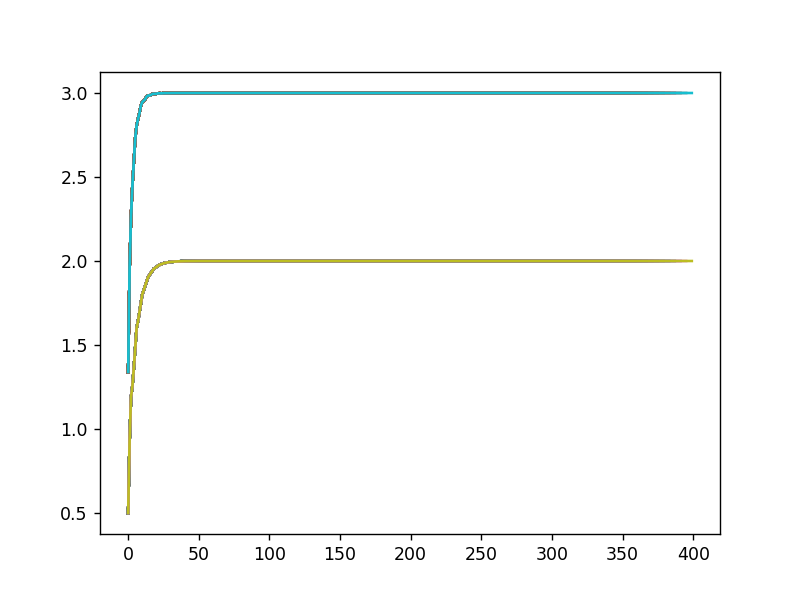

(1.9999999999999998, 3.0, 1.9721522630525295e-31)

In [184]:
Adagrad(x,y,0.5,100,30)

# 6. RMSProb Optimizer

In [186]:
def fx2(x):
    return 2*x + 3
  
x = np.array(np.linspace(-1, 1, 100))
y = np.array([fx2(x) for x in x])

In [187]:
import time

def create_Mini_batch(X,y,batch_size):
    
    if len(X.shape)<2:
        data=np.hstack((X.reshape(-1,1),y.reshape(-1,1)))
    else:
        data=np.hstack((X,y))
    random_data=np.random.shuffle(data)
    mini_batch=[]
    for i in range(0,data.shape[0],batch_size):
        mini_x=data[i:i+batch_size,:-1]
        mini_y=data[i:i+batch_size,-1]
        mini_batch.append([mini_x.flatten(),mini_y])
    return mini_batch

def RMSPROB(X,y,lr,iteration,batch_size,beta=0.95,eps=0.01):
    if len(X.shape)<2:
        weight=0
        bias=0
    else:
        weight=np.zeros(X.shape[1])
        bias=np.zeros(0)
    
    W_list,b_list,cost_list=[],[],[]
    fig=plt.figure()
    ax=fig.add_subplot(111)
    mini_batch=create_Mini_batch(X,y,batch_size)
    G_W,G_b=0,0
    for i in range(iteration):
        for minibatch in mini_batch:
            n=len(minibatch[0])
            YP=minibatch[0]*weight+bias
            cost=sum((minibatch[1]-YP)**2)
            dw=(-2/n)*(sum((minibatch[1]-YP)*minibatch[0]))
            db=(-2/n)*(sum((minibatch[1]-YP)))
            G_W=beta*G_W + (1-beta)*(dw**2)
            G_b=beta*G_b + (1-beta)*(db**2)
            weight=weight-((lr/np.sqrt(G_W + eps))*dw)
            bias=bias-((lr/np.sqrt(G_b + eps))*db)
            cost_list.append(cost)
            W_list.append(weight)
            b_list.append(bias)
#         ax.scatter(W_list,cost_list)
#         ax.plot(cost)
        ax.plot(W_list)
        ax.plot(b_list)
        fig.canvas.draw()
    return weight,bias,cost
def predict(X,W,b):
    return X*W+b

<IPython.core.display.Javascript object>


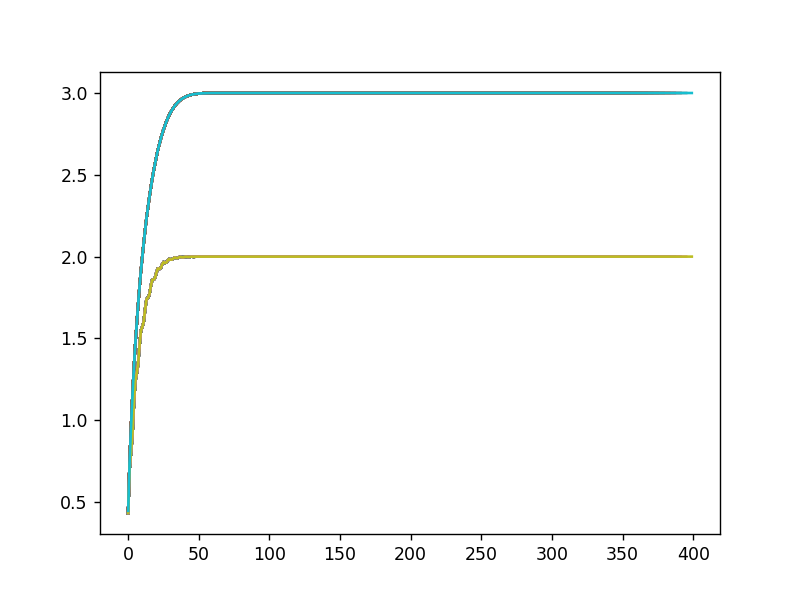

(2.0, 3.0, 0.0)

In [188]:
RMSPROB(x,y,0.1,100,30)

# 7. Adam Optimizer

In [ ]:
def fx2(x):
    return 2*x + 3
  
x = np.array(np.linspace(-1, 1, 100))
y = np.array([fx2(x) for x in x])

In [194]:
import time

def create_Mini_batch(X,y,batch_size):
    
    if len(X.shape)<2:
        data=np.hstack((X.reshape(-1,1),y.reshape(-1,1)))
    else:
        data=np.hstack((X,y))
    random_data=np.random.shuffle(data)
    mini_batch=[]
    for i in range(0,data.shape[0],batch_size):
        mini_x=data[i:i+batch_size,:-1]
        mini_y=data[i:i+batch_size,-1]
        mini_batch.append([mini_x.flatten(),mini_y])
    return mini_batch

def Adam(X,y,lr,iteration,batch_size,beta1=0.90,beta2=0.95,eps=0.01):
    if len(X.shape)<2:
        weight=0
        bias=0
    else:
        weight=np.zeros(X.shape[1])
        bias=np.zeros(0)
    
    W_list,b_list,cost_list=[],[],[]
    fig=plt.figure()
    ax=fig.add_subplot(111)
    mini_batch=create_Mini_batch(X,y,batch_size)
    G_W,G_b=0,0
    V_W,V_b=0,0
    for i in range(iteration):
        for minibatch in mini_batch:
            n=len(minibatch[0])
            YP=minibatch[0]*weight+bias
            cost=sum((minibatch[1]-YP)**2)
            dw=(-2/n)*(sum((minibatch[1]-YP)*minibatch[0]))
            db=(-2/n)*(sum((minibatch[1]-YP)))
            
# Calculating Velocity
            V_W=(beta1*V_W)+(1-beta1)*dw
            V_b=(beta1*V_b)+(1-beta1)*db
# Bias Correction

            V_b=V_b/(1-beta1**i+1)
            V_W=V_W/(1-beta1**i+1)
        
# Calculating Mov avg for RMSprob
            G_W=beta2*G_W + (1-beta2)*(dw**2)
            G_b=beta2*G_b + (1-beta2)*(db**2)
        
# Bias Correction
            G_W=G_W/(1-beta2**i+1)
            G_b=G_b/(1-beta2**i+1)
            
            weight=weight-((lr/np.sqrt(G_W + eps))*V_W)
            bias=bias-((lr/np.sqrt(G_b + eps))*V_b)
            cost_list.append(cost)
            W_list.append(weight)
            b_list.append(bias)
#         ax.scatter(W_list,cost_list)

#         ax.plot(cost)
            ax.plot(W_list)
            ax.plot(b_list)
            fig.canvas.draw()
    return weight,bias,cost
def predict(X,W,b):
    return X*W+b

<IPython.core.display.Javascript object>


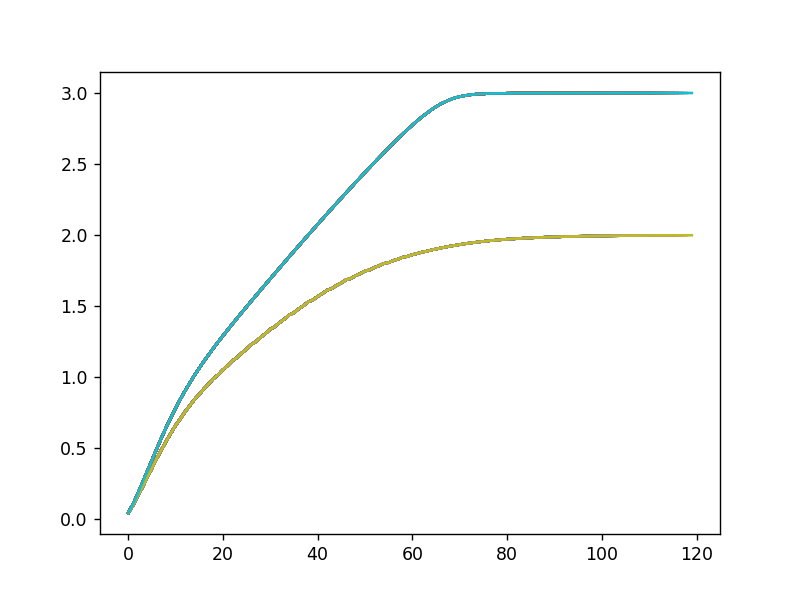

(1.9985893127229803, 2.9998930086204445, 9.607918598507012e-06)

In [195]:
Adam(x,y,0.1,30,30)